# Schoelzel Capstone - Part II
Exploratory Data Analysis and Image Recognition 






---

### Background
Below is my initial EDA and processing work on the CDiscount image recognition dataset. For reference, cDiscount is a [French eCommerce business](https://www.cdiscount.com). They are currently holding a Kaggle competition using image data to predict product categories.

---


### Plan of Action
So far, I have downloaded the first 100 rows of image data from the contest website and written some methods to evaluate the images and save them to a dataframe.  In the next step, I will need to pull down more data from the larger training file, and access the first few thousand rows. I plan to use this more manageable dataset to experiement, while keeping in mind the need to have streaming/generator solutions in place to ultimately evaluate the whole training and test datasets. 

A key consideration will be efficiency. Specifically, using sparse dataframes where possible and making sure that booleans and int/float values are converted to smaller, more efficient bit-sizes.

During this experimentation and modeling phase, I will use the OpenCV and Keras Libraries. These will help me with feature engineering and adding columns to the dataframe to classify and evaluate the pictures. 

For the modeling section itself, I plan to start by using different SGD Classifiers, XgBoost, Neural Nets, and Logistic Regressions. As I begin experiementing with the data, I will see which models are the most helpful for identifying item categories.

As a final step, I will look into incorporating some of the category identifiers from the kaggle website. The contest insists that all the data needed to solve the problem is included in the test and train files, however an external classification csv may also provide some insights. Time permitting, I will evaluate some unsupervised methods of classification on this dataset, to see if it renders helpful inputs to the main model. 

The contest requires contestants not to use external data. Time permitting, I may evaluate some external data to the extent it helps build domain knowledge, but will keep this segregated from my main model. 

---
### Data 
A link to the Kaggle Contest Page can be found [here](https://www.kaggle.com/c/cdiscount-image-classification-challenge)

A link to the data can be found [here](https://www.kaggle.com/c/cdiscount-image-classification-challenge/data) 

---
### Next Steps
My next steps are to begin working with the OpenCV and Keras libaries to begin building features in my data and to set up a streaming/data pipeline for pulling out chunks of data from the main test file.

---
Below are my initial steps to downloading the training example file and evaluating images. 

In [1]:
# Testing code from jupyter notebook posted here: https://www.kaggle.com/inversion/processing-bson-files

In [2]:
import io
import bson
import numpy as np
import pandas as pd 

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) 
# will list the files in the input directory

import cv2

from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))
# Any results you write to the current directory are saved as output. 
#KS Ask about this line

import matplotlib.pyplot as plt
%matplotlib inline 
from skimage.data import imread   # or, whatever image library you prefer
import multiprocessing as mp      # will come in handy due to the size of the data


In [3]:
# Note that while the package is still called cv2 the underlying version is cd3
cv2.__version__

'3.3.0'

# Testing several methods to navigate generators and iterators


In [4]:
#bson.decode_all()

In [5]:
data = bson.decode_file_iter(open('train_example.bson', 'rb')) # what is rb <-- Reading Bytes # Go read iterate

In [5]:
#data = bson.decode_file_iter(open('train_example.bson', 'rb'))

In [6]:
data

<generator object decode_file_iter at 0x1100a08e0>

In [6]:
#dir(data)

In [7]:
# itr= iter(bson.decode_iter(open('train_example.bson', 'rb')))
# print(itr)

In [8]:
#print(next(itr))

In [9]:
# # Trying to do all getting error that it is not all bytes, must be other things in file?
# data2 = bson.decode_all(open('train_example.bson', 'rb'))

# Starting again using for loop 


In [16]:
data = bson.decode_file_iter(open('train_example.bson', 'rb'))

In [17]:
# Saved items from Generator to list
lst_items = []
for x in data: 
    lst_items.append(x)

In [18]:
lst_items

[{'_id': 0,
  'category_id': 1000010653,
  'imgs': [{'picture': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x00\xb4\x00\xb4\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\

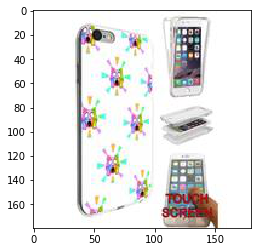

In [5]:
# YES! Got it to work where I can now pull picture data! Now to turn into function
pic= lst_items[62]['imgs'][0]['picture']
picture2 = imread(io.BytesIO(pic))
plt.imshow(picture2)

In [12]:
lst_items

[{'_id': 0,
  'category_id': 1000010653,
  'imgs': [{'picture': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x00\xb4\x00\xb4\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\

In [7]:
# Function to display photo's using their ID Number from list
def show_pic (id_num, lst):
    '''Load the ID number from list and list from bson generator to show that picture'''
    pc = lst[id_num]['imgs'][0]['picture']
    pc2 = imread(io.BytesIO(pc))
    return plt.imshow(pc2)

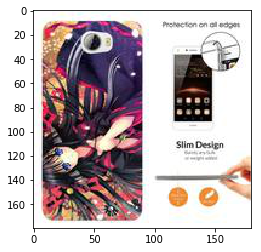

In [25]:
show_pic(56, lst_items)

In [10]:
# Make method to get the array for the image, this is what I will need to create DF which will later parse
def data_pic(id_num, lst):
    '''function returns pixels as text for the pictures loaded'''
    pc = lst[id_num]['imgs'][0]['picture']
    return pc



In [11]:
data_pic(1, lst_items)

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x00\xb4\x00\xb4\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\

# Now Creating DF which will hold ID Number, Category Number and picture as data



In [177]:
lst_items[0]['imgs'][0]['picture']

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x00\xb4\x00\xb4\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\

In [12]:
# Created list of  dictionaries to build into PD DF

master_list =[]

for num in range(len(lst_items)):
    d_temp = {}
    d_temp["_id"] = lst_items[num]["_id"]
    d_temp["category_id"] = lst_items[num]["category_id"]
    d_temp['picture'] = lst_items[num]['imgs'][0]['picture']
    master_list.append(d_temp)

In [13]:
df = pd.DataFrame(master_list)

In [14]:
df.head(25)

_id  category_id                                            picture
0     0   1000010653  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
1     1   1000010653  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
2     2   1000004079  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
3     3   1000004141  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
4     4   1000015539  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
5     5   1000010653  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
6     6   1000005744  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
7     7   1000004079  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
8     8   1000010667  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
9     9   1000018290  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
10   11   1000010653  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
11   12   1000018306  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
12   13   1000010961  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
13   15   1000015309  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
14   16   1000010653  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
15   17   1000007361  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
16   18   1000018294  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
17   19   1000014287  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
18   20   1000010653  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
19   22   1000005910  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
20   25   1000010653  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
21   26   1000001859  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
22   28   1000010653  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
23   30   1000010653  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
24   31   1000010653  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...

In [201]:
#df.loc[df['_id'] == 26]['picture'].iloc[0]

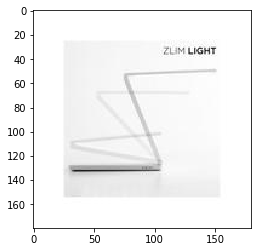

In [15]:
pc = df.loc[df['_id'] == 26]['picture'].iloc[0]
pc2 = imread(io.BytesIO(pc))
plt.imshow(pc2)

In [17]:
def show_pic_from_df (id_num, data_frame):
    '''Load the ID number from list and list from bson generator to show that picture'''
    pc = data_frame.loc[data_frame['_id'] == id_num]['picture'].iloc[0]
    pc2 = imread(io.BytesIO(pc))
    return plt.imshow(pc2)

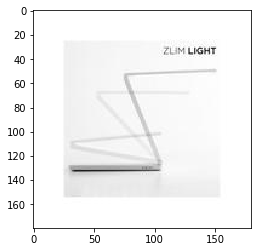

In [18]:
show_pic_from_df(26, df)

# Dataframe EDA 


In [19]:
df.head()

_id  category_id                                            picture
0    0   1000010653  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
1    1   1000010653  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
2    2   1000004079  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
3    3   1000004141  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
4    4   1000015539  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...

In [206]:
df.dtypes

_id             int64
category_id     int64
picture        object
dtype: object

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 3 columns):
_id            82 non-null int64
category_id    82 non-null int64
picture        82 non-null object
dtypes: int64(2), object(1)
memory usage: 2.0+ KB


In [21]:
df.describe()

_id   category_id
count   82.000000  8.200000e+01
mean    48.878049  1.000010e+09
std     29.047169  3.609477e+03
min      0.000000  1.000002e+09
25%     25.250000  1.000011e+09
50%     49.000000  1.000011e+09
75%     72.750000  1.000011e+09
max    101.000000  1.000018e+09

In [216]:
df['_id'].value_counts().sum()

82

In [22]:
df['category_id'].value_counts()

1000010653    36
1000010667     4
1000004079     4
1000018294     2
1000004141     2
1000018290     2
1000015309     2
1000010683     2
1000013922     1
1000010706     1
1000005796     1
1000011423     1
1000005910     1
1000010647     1
1000010645     1
1000010641     1
1000010061     1
1000012558     1
1000003977     1
1000015539     1
1000012989     1
1000014396     1
1000003191     1
1000007361     1
1000001859     1
1000003787     1
1000014287     1
1000010961     1
1000012993     1
1000010461     1
1000007138     1
1000014053     1
1000005990     1
1000005744     1
1000004085     1
1000018306     1
Name: category_id, dtype: int64

# From Kaggle Discussion Group

Used this code to start unpacking BSON Files and figuring out how the data is arranged. 



In [54]:
# Simple data processing

prod_to_category = dict()

for c, d in enumerate(data):
    product_id = d['_id']
    category_id = d['category_id'] # This won't be in Test data
    prod_to_category[product_id] = category_id
    for e, pic in enumerate(d['imgs']):
        picture = imread(io.BytesIO(pic['picture']))
        # do something with the picture, etc

prod_to_category = pd.DataFrame.from_dict(prod_to_category, orient='index')
prod_to_category.index.name = '_id'
prod_to_category.rename(columns={0: 'category_id'}, inplace=True)

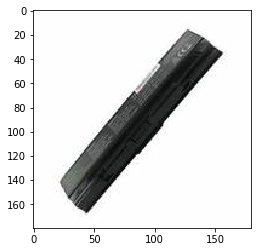

In [50]:
plt.imshow(picture)

In [55]:
prod_to_category.shape

(82, 1)

In [56]:
type(d)

dict

In [57]:
type(d['imgs'])

list

In [58]:
len(d['imgs'])

1

In [69]:
type(d['imgs'][0]['picture'])


bytes

In [ ]:
# Working with Byte Strings. Example File shows how to decode 

In [59]:
# stored byte string

d['imgs']


[{'picture': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x00\xb4\x00\xb4\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9

In [6]:
prod_to_category.head()

category_id
_id             
0     1000010653
1     1000010653
2     1000004079
3     1000004141
4     1000015539

experiementing with CV3 and trying to analyze the images I have in the data set


In [1]:
#df=pd.read_csv("Category_names1.csv")

In [16]:
len(df["category_level2"].unique())

483

In [19]:
import random
for x in range(10):
  print(random.randint(4890,10000))

9185
9805
9213
6963
9668
7917
9119
9796
6703
8606
